<a href="https://colab.research.google.com/github/nguyenanhbinh27042002/Artificial-intelligence-AI-/blob/main/ControlTemperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Controll Temperature

In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 17.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=ecb9be5a27ec8ab1e10f10e538f79a12a0b11328ba5c19762d4a58ff2760f9e0
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


<ipython-input-3-2b72de2728b4>:65: UserWarning: The following kwargs were not used by contour: 'anlpha'
  cset = ax.contourf(x,y,z,zdir='z',offset = 5,cmap='viridis',anlpha = 0.5)
<ipython-input-3-2b72de2728b4>:66: UserWarning: The following kwargs were not used by contour: 'anlpha'
  cset = ax.contourf(x,y,z,zdir='y',offset = 10,cmap='viridis',anlpha = 0.5)
<ipython-input-3-2b72de2728b4>:67: UserWarning: The following kwargs were not used by contour: 'anlpha'
  cset = ax.contourf(x,y,z,zdir='x',offset = 15,cmap='viridis',anlpha = 0.5)


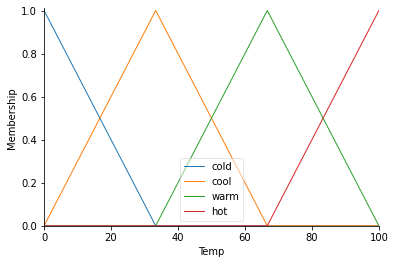

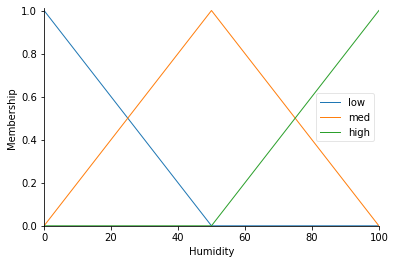

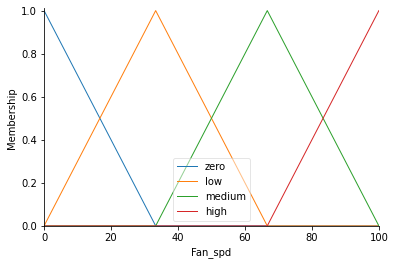

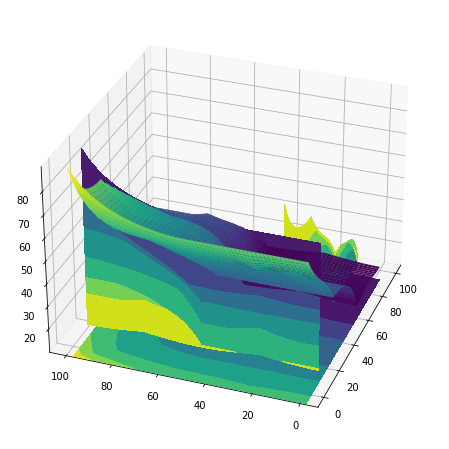

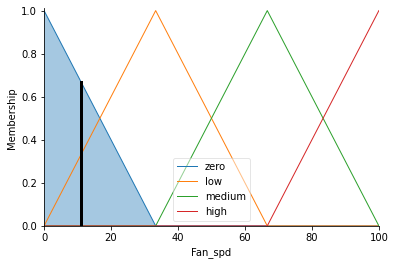

In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from skfuzzy.control.controlsystem import Antecedent
from mpl_toolkits.mplot3d import axis3d
from networkx.algorithms.bipartite import projection

# Input variables
universe1 = np.linspace(0,100,61) # valve of temp and humidity 
universe2 = np.linspace(0,100,61)  # valve of fan_spd 
# Define the membership functions for the input variables
temp=ctrl.Antecedent(universe1,'Temp')
humidity=ctrl.Antecedent(universe1,'Humidity')
# Define the membership functions for the output variable
fan_spd=ctrl.Consequent(universe2,'Fan_spd')

name_temp=['cold','cool','warm','hot']
name_humidity=['low','med','high']
name_fan_spd=['zero','low','medium','high']

# paint diagram input and output 
temp.automf(names=name_temp)
humidity.automf(names=name_humidity)
fan_spd.automf(names=name_fan_spd)

#view input and output 
temp.view()
humidity.view()
fan_spd.view()

# Define Rules
rule1 = ctrl.Rule(temp['cold'] & humidity['high'], fan_spd['high'])
rule2 = ctrl.Rule(temp['cool'] & humidity['high'], fan_spd['medium'])
rule3 = ctrl.Rule(temp['warm'] & humidity['high'], fan_spd['low'])
rule4 = ctrl.Rule(temp['hot'] & humidity['high'], fan_spd['zero'])
rule5 = ctrl.Rule(temp['cold'] & humidity['med'], fan_spd['medium'])
rule6 = ctrl.Rule(temp['cool'] & humidity['med'], fan_spd['low'])
rule7 = ctrl.Rule(temp['warm'] & humidity['med'], fan_spd['zero'])
rule8 = ctrl.Rule(temp['hot'] & humidity['med'], fan_spd['zero'])
rule9 = ctrl.Rule(temp['cold'] & humidity['low'], fan_spd['medium'])
rule10 = ctrl.Rule(temp['cool'] & humidity['low'], fan_spd['low'])
rule11 = ctrl.Rule(temp['warm'] & humidity['low'], fan_spd['zero'])
rule12 = ctrl.Rule(temp['hot'] & humidity['low'], fan_spd['zero'])

# Control system
fan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
fan_speed_simulation = ctrl.ControlSystemSimulation(fan_ctrl,flush_after_run=61*61+1)

# Compute
upsampled = np.linspace(0,100,61)
x,y = np.meshgrid(upsampled,upsampled)
z =np.zeros_like(x)
for i in range(61):
  for j in range(61):
      fan_speed_simulation.input['Temp']= x[i,j]
      fan_speed_simulation.input['Humidity']= y[i,j]
      fan_speed_simulation.compute()  
      z[i,j]= fan_speed_simulation.output['Fan_spd']

# print(valve_simulation.output['valve'])
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
suf = ax.plot_surface(x,y,z,rstride=1 ,cstride=1 ,cmap='viridis',linewidth=0.4,antialiased =True)
cset = ax.contourf(x,y,z,zdir='z',offset = 5,cmap='viridis',anlpha = 0.5)
cset = ax.contourf(x,y,z,zdir='y',offset = 10,cmap='viridis',anlpha = 0.5)
cset = ax.contourf(x,y,z,zdir='x',offset = 15,cmap='viridis',anlpha = 0.5)
ax.view_init(30,200)

# power
fan_spd.view(sim = fan_speed_simulation)
